In [1]:
!pip install yt-dlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 10.9 MB/s eta 0:00:00a 0:00:01


In [2]:
import os

os.getcwd()

'/data/sllm/src/finetuning/my-test'

In [4]:
import os
import subprocess

def download_video(url, output_path):
    """
    주어진 url에서 비디오를 다운로드하여 출력 경로에 저장합니다.

    매개변수:
    url (str): 다운로드할 비디오의 URL입니다.
    output_path (str): 비디오를 저장할 경로입니다.

    반환값:
    dict: 비디오의 메타데이터가 포함된 사전입니다.
    """
    # 경로 생성
    os.makedirs(output_path, exist_ok=True)

    # yt-dlp 명령 실행
    command = f'yt-dlp -o "{output_path}/%(title)s.%(ext)s" {url}'
    subprocess.run(command, shell=True, check=True)

    # 메타데이터 추출
    video_title = subprocess.getoutput(f'yt-dlp --print "%(title)s" {url}')
    video_author = subprocess.getoutput(f'yt-dlp --print "%(uploader)s" {url}')
    video_views = subprocess.getoutput(f'yt-dlp --print "%(view_count)s" {url}')

    metadata = {
        "Author": video_author.strip(),
        "Title": video_title.strip(),
        "Views": int(video_views.strip()) if video_views.strip().isdigit() else 0
    }

    return metadata

# 함수 사용 예시
video_url = "https://www.youtube.com/watch?v=NpaYYnNEDug"
output_path = "content/video_data/"
metadata = download_video(video_url, output_path)

print("다운로드 완료!")
print("비디오 메타데이터:", metadata)


[youtube] Extracting URL: https://www.youtube.com/watch?v=NpaYYnNEDug
[youtube] NpaYYnNEDug: Downloading webpage
[youtube] NpaYYnNEDug: Downloading ios player API JSON
[youtube] NpaYYnNEDug: Downloading mweb player API JSON
[youtube] NpaYYnNEDug: Downloading m3u8 information
[info] NpaYYnNEDug: Downloading 1 format(s): 137+251
[download] Destination: content/video_data//I choose us.f137.mp4
[download] 100% of   76.95MiB in 00:00:07 at 10.56MiB/s    
[download] Destination: content/video_data//I choose us.f251.webm
[download] 100% of    4.97MiB in 00:00:00 at 6.15MiB/s   
[Merger] Merging formats into "content/video_data//I choose us.mkv"
Deleting original file content/video_data//I choose us.f251.webm (pass -k to keep)
Deleting original file content/video_data//I choose us.f137.mp4 (pass -k to keep)
다운로드 완료!
비디오 메타데이터: {'Author': 'Bob TheHumanBeing', 'Title': 'I choose us', 'Views': 152301}


In [5]:
from moviepy.editor import VideoFileClip
import os

def video_to_images(video_path, output_folder):
    """
    비디오를 이미지 시퀀스로 변환하여 출력 폴더에 저장합니다.

    매개변수:
    video_path (str): 비디오 파일의 경로입니다.
    output_folder (str): 이미지를 저장할 폴더의 경로입니다.
    """
    # 출력 폴더 생성
    os.makedirs(output_folder, exist_ok=True)

    # 비디오 클립 로드 및 이미지 시퀀스 저장
    clip = VideoFileClip(video_path)
    clip.write_images_sequence(
        os.path.join(output_folder, "frame%04d.png"), fps=0.2  # 프레임 속도를 제어합니다.
    )

    print(f"이미지 시퀀스가 {output_folder}에 저장되었습니다.")

video_path = "content/video_data/I choose us.mkv"
output_folder = "content/video_frames/"  # 이미지를 저장할 폴더 경로
video_to_images(video_path, output_folder)

Moviepy - Writing frames content/video_frames/frame%04d.png.


Moviepy - Done writing frames content/video_frames/frame%04d.png.
이미지 시퀀스가 content/video_frames/에 저장되었습니다.


In [6]:
from moviepy.editor import VideoFileClip

def video_to_audio(video_path, output_audio_path):
    """
    비디오를 오디오로 변환하여 출력 경로에 저장합니다.

    매개변수:
    video_path (str): 비디오 파일의 경로입니다.
    output_audio_path (str): 오디오를 저장할 경로입니다.
    """
    # 비디오 클립 로드
    clip = VideoFileClip(video_path)
    # 오디오 추출
    audio = clip.audio
    # 오디오 저장
    audio.write_audiofile(output_audio_path)
    print(f"오디오가 {output_audio_path}에 저장되었습니다.")

# 함수 실행 예시
video_path = "content/video_data/I choose us.mkv"
output_audio_path = "content/audio_output/output_audio.mp3"

# 출력 경로 확인 및 생성
import os
os.makedirs(os.path.dirname(output_audio_path), exist_ok=True)

# 함수 실행
video_to_audio(video_path, output_audio_path)

MoviePy - Writing audio in content/audio_output/output_audio.mp3


MoviePy - Done.
오디오가 content/audio_output/output_audio.mp3에 저장되었습니다.


In [18]:
!pip install pydub ffmpeg

  Using cached pydub-0.25.1-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached ffmpeg-1.4-py3-none-any.whl
Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)


오디오 파일 노이즈 제거

In [20]:
from pydub import AudioSegment

# 오디오파일 가져오기
audio = AudioSegment.from_file("content/audio_output/output_audio.mp3")

# 노이즈 제거
audio = audio.low_pass_filter(3000)  # Example low-pass filter

# 볼륨 높이기 + 5 dB
more_volume = audio + 5
more_volume.export("content/audio_output/output_audio.wav", format="wav")

<_io.BufferedRandom name='content/audio_output/output_audio.wav'>

In [10]:
!pip install openai-whisper

  Using cached openai_whisper-20240930-py3-none-any.whl
  Using cached more_itertools-10.5.0-py3-none-any.whl.metadata (36 kB)
Using cached more_itertools-10.5.0-py3-none-any.whl (60 kB)


In [25]:
#라이브러리 임포트
import whisper
import math
import heapq
from pyannote.audio import Pipeline

In [26]:
#whisper 라이브러리 사용
model = whisper.load_model("base", device="cuda")

# temperature,  best_of
transcribe_result = model.transcribe(
    "content/audio_output/output_audio.mp3",
    language="en",
    temperature=0.5,
    best_of=3
)

print("[WHISPER] Transcribed text:\n", transcribe_result["text"])

# text to file
text_file_path = "content/audio_output/output_text.txt"
with open(text_file_path, "w", encoding="utf-8") as text_file:
    text_file.write(transcribe_result["text"])
print(f"[WHISPER] Transcribed text saved to {text_file_path}")

whisper_intervals = []
text_data = []
for segment in transcribe_result["segments"]:
    start_time = segment["start"]
    end_time = segment["end"]
    text = segment["text"]
    whisper_intervals.append(f"[{start_time:.3f} --> {end_time:.3f}]")
    text_data.append(f"[{start_time:.3f} --> {end_time:.3f}] {text}")


[WHISPER] Transcribed text:
  The Kate, you can't go. Don't get on that plane. Please let's just go have a cup of coffee. That's all I'm asking for. I'm sure there's another flight to Paris tonight. Jack, what are you doing here? Do you need closure? Because if you do after all these years, you got it. I'm okay. I'm fine. I was heartbroken, Jack, but I got over it. I moved on and you should move on too. Okay? I'm sorry. I just can't, I've got to go. Oh, I'm sorry, Jack. I'm sorry, excuse me. Can I just, I'm sorry, I was here. We have a house in Jersey. We have two kids, Annie and Josh. And he's not much of a violin player but he tries real hard. She's a little precocious, but that's only because she says what's on her mind. And when she smiles. And Josh, he has your eyes. He doesn't say much, but we know he's smart. He's always got his eyes open, you know. He's always watching us. Sometimes, you can look at him and you just know he's learning something new. It's like witnessing a mirac

In [ ]:
#pyannote로 화자 분리 코드
pipeline = Pipeline.from_pretrained(
    "pyannote/speaker-diarization-3.1",
    use_auth_token=input("huggingface token")
)

diarization = pipeline("content/audio_output/output_audio.wav")

speaker_intervals = {}
for turn, _, speaker_label in diarization.itertracks(yield_label=True):
    start_time = turn.start
    end_time = turn.end

    if speaker_label not in speaker_intervals:
        speaker_intervals[speaker_label] = []
    
    speaker_intervals[speaker_label].append(f"[{start_time:.3f} --> {end_time:.3f}]")



Could not download 'pyannote/segmentation-3.0' model.
It might be because the model is private or gated so make
sure to authenticate. Visit https://hf.co/settings/tokens to
create your access token and retry with:

   >>> Model.from_pretrained('pyannote/segmentation-3.0',
   ...                       use_auth_token=YOUR_AUTH_TOKEN)

If this still does not work, it might be because the model is gated:
visit https://hf.co/pyannote/segmentation-3.0 to accept the user conditions.


AttributeError: 'NoneType' object has no attribute 'eval'

In [28]:
# 필요한 함수 정의
def time_to_seconds(interval_str):
    """Converts a bracketed time interval '[start --> end]' to floats."""
    start_str, end_str = interval_str.strip("[]").split(" --> ")
    return float(start_str), float(end_str)

def parse_text_data(text_data_list):
    """
    Parses lines like '[start --> end] some text' into 
    [(start, end, text), ...].
    """
    parsed = []
    for line in text_data_list:
        time_part, text_part = line.split(']', 1)
        time_part += ']'  # Re-add the closing bracket
        start_val, end_val = time_to_seconds(time_part)
        parsed.append((start_val, end_val, text_part.strip()))
    return parsed

In [29]:
#time stamp
speaker_intervals_seconds = {
    speaker: [time_to_seconds(interval) for interval in intervals]
    for speaker, intervals in speaker_intervals.items()
}

all_intervals = []
for speaker, intervals in speaker_intervals_seconds.items():
    all_intervals.extend(intervals)

if not all_intervals:
    print("[WARNING] No speaker intervals found. Skipping speaker area calculation.")
else:
    max_time = math.ceil(max(interval[1] for interval in all_intervals))
    areas = {
        speaker: [[0, 0] for _ in range(max_time + 1)]
        for speaker in speaker_intervals_seconds.keys()
    }

    heaps = {speaker: intervals for speaker, intervals in speaker_intervals_seconds.items()}
    for speaker, heap_data in heaps.items():
        heapq.heapify(heap_data)

    for speaker, heap_data in heaps.items():
        while heap_data:
            start, end = heapq.heappop(heap_data)
            area = areas[speaker]

            if (math.floor(start) + 1) < len(area) and math.floor(end) < len(area):
                area[math.floor(start)+1 : math.floor(end)] = [
                    [0.5, 0.5]
                    for _ in range(math.floor(end) - math.floor(start) - 1)
                ]

            if math.floor(start) < len(area):
                frac_start = start - math.floor(start)
                if frac_start > 0.5:
                    area[math.floor(start)][1] = max(0.5 - (frac_start), area[math.floor(start)][1])
                else:
                    area[math.floor(start)][1] = 0.5
                    area[math.floor(start)][0] = max(frac_start, area[math.floor(start)][0])

            if math.floor(end) < len(area):
                frac_end = end - math.floor(end)
                if frac_end < 0.5:
                    area[math.floor(end)][0] = max(frac_end, area[math.floor(end)][1])
                else:
                    area[math.floor(end)][0] = 0.5
                    area[math.floor(end)][1] = max(frac_end - 0.5, area[math.floor(end)][1])

In [ ]:
#optional
result_speaker_labels = []
if all_intervals:
    for interval in all_intervals:
        start, end = interval
        scores = {speaker: 0 for speaker in speaker_intervals_seconds.keys()}

        for speaker, area in areas.items():
            for i in range(math.floor(start), math.ceil(end)):
                if 0 <= i < len(area):
                    scores[speaker] += sum(area[i])

        best_speaker = max(scores, key=scores.get)
        result_speaker_labels.append((interval, best_speaker))

    print("\n[AREA-BASED SPEAKER ASSIGNMENT]")
    for interval_info, speaker in result_speaker_labels:
        print(f"Interval {interval_info}: Speaker {speaker}")


In [30]:
#화자와 대사 매치 하기!
def map_speakers_to_text(text_data_list, speaker_intervals_map):
    parsed_text = parse_text_data(text_data_list)

    # Convert each speaker's intervals into numeric form
    speaker_intervals_secs = {
        spk: [time_to_seconds(iv) for iv in iv_list]
        for spk, iv_list in speaker_intervals_map.items()
    }

    final_result = []
    for start, end, text in parsed_text:
        assigned_speaker = "UNKNOWN"
        # Check overlap
        for spk, iv_list in speaker_intervals_secs.items():
            for s_start, s_end in iv_list:
                # Overlap conditions
                if (
                    (s_start <= start < s_end) or
                    (s_start < end <= s_end) or
                    (start <= s_start and end >= s_end)
                ):
                    assigned_speaker = spk
                    break
            if assigned_speaker != "UNKNOWN":
                break
        final_result.append(f"[{start:.3f} --> {end:.3f}] {assigned_speaker}: {text}")
    return final_result

# Now map the text_data from Whisper to the speaker_intervals from Pyannote
final_speaker_text = map_speakers_to_text(text_data, speaker_intervals)

print("\n[FINAL MAPPED TEXT WITH SPEAKERS]")
for line in final_speaker_text:
    print(line)


[FINAL MAPPED TEXT WITH SPEAKERS]
[0.000 --> 2.460] SPEAKER_00: The
[11.560 --> 22.600] SPEAKER_02: Kate, you can't go. Don't get on that plane. Please let's just go have a cup of coffee. That's all I'm asking for. I'm sure there's another flight to Paris tonight.
[23.940 --> 27.460] SPEAKER_00: Jack, what are you doing here?
[30.000 --> 33.080] SPEAKER_01: Do you need closure?
[33.080 --> 39.780] SPEAKER_01: Because if you do after all these years, you got it. I'm okay. I'm fine.
[39.780 --> 52.600] SPEAKER_01: I was heartbroken, Jack, but I got over it. I moved on and you should move on too.
[52.600 --> 58.360] SPEAKER_01: Okay? I'm sorry. I just can't, I've got to go.
[58.360 --> 64.360] SPEAKER_01: Oh, I'm sorry, Jack. I'm sorry, excuse me.
[68.360 --> 72.360] SPEAKER_01: Can I just, I'm sorry, I was here.
[82.360 --> 86.360] SPEAKER_02: We have a house in Jersey.
[87.360 --> 94.360] SPEAKER_02: We have two kids, Annie and Josh. And he's not much of a violin player but he tries re

In [34]:
# 텍스트 파일로 저장
output_file_path = "content/audio_output/mapped_text_with_speakers.txt"
with open(output_file_path, "w", encoding="utf-8") as file:
    file.write("\n".join(final_speaker_text))

print(f"\n[INFO] 화자와 매칭된 텍스트가 {output_file_path} 파일로 저장되었습니다!")


[INFO] 화자와 매칭된 텍스트가 content/audio_output/mapped_text_with_speakers.txt 파일로 저장되었습니다!


In [35]:
!pip install --upgrade llama-index lancedb
!pip install llama-index-vector-stores-lancedb
!pip install llama-index-embeddings-clip
!pip install git+https://github.com/openai/CLIP.git

INFO: pip is looking at multiple versions of lancedb to determine which version is compatible with other requirements. This could take a while.
  Using cached beautifulsoup4-4.12.3-py3-none-any.whl.metadata (3.8 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached soupsieve-2.6-py3-none-any.whl.metadata (4.6 kB)
  Using cached certifi-2024.12.14-py3-none-any.whl.metadata (2.3 kB)
  Using cached jiter-0.8.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.2 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 9.2 MB/s eta 0:00:00a 0:00:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 11.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 10.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 10.7 MB/s eta 0:00:00
Using cached beautifulsoup4-4.12.3-py3-none-any.whl (147 kB)
Usi

In [38]:
pip install pydantic==1.10.7

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 10.9 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.10.5
    Uninstalling pydantic-2.10.5:
      Successfully uninstalled pydantic-2.10.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gnewchat 0.83 requires openai==0.28.1, but you have openai 1.59.6 which is incompatible.
langchain-core 0.1.42 requires langsmith<0.2.0,>=0.1.0, but you have langsmith 0.0.92 which is incompatible.
llama-index-core 0.12.10.post1 requires pydantic>=2.8.0, but you have pydantic 1.10.7 which is incompatible.
milvus-setup 0.2 requires torch==2.3.0, but you have torch 2.2.2 which is incompatible.
outlines 0.0.34 requires pydantic>=2.0, but you have pydantic 1.10.7 which is incompatible.
vllm 0.4.0.post1 requires pydantic>=2.0, but you have pydantic 1.10.7 which is incompatib

In [2]:
!pip uninstall llama-index --yes
!pip install llama-index


Found existing installation: llama-index 0.12.10
Uninstalling llama-index-0.12.10:
  Successfully uninstalled llama-index-0.12.10
  Using cached llama_index-0.12.10-py3-none-any.whl.metadata (11 kB)
Using cached llama_index-0.12.10-py3-none-any.whl (6.8 kB)


In [3]:
!pip install --upgrade openai pydantic clip-by-openai


INFO: pip is looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of clip-by-openai to determine which version is compatible with other requirements. This could take a while.
ERROR: Cannot install clip-by-openai==0.1.0, clip-by-openai==0.1.1, clip-by-openai==0.1.1.2, clip-by-openai==0.1.1.3, clip-by-openai==0.1.1.4, clip-by-openai==0.1.1.5, clip-by-openai==1.0.1 and clip-by-openai==1.1 because these package versions have conflicting dependencies.

The conflict is caused by:
    clip-by-openai 1.1 depends on torch<1.7.2 and >=1.7.1
    clip-by-openai 1.0.1 depends on torch<1.7.2 and >=1.7.1
    clip-by-openai 0.1.1.5 depends on torch==1.7.1
    clip-by-openai 0.1.1.4 depends on torch==1.7.1
    clip-by-openai 0.1.1.3 depends on torch==1.7.1
    clip-by-openai 0.1.1.2 depends on torch==1.7.1
    clip-by-openai 0.1.1 depends on torch==1.7.1
    clip-by-opena

In [77]:
pip install weaviate-client


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 11.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 10.7 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.2
    Uninstalling protobuf-3.20.2:
      Successfully uninstalled protobuf-3.20.2
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.60.0
    Uninstalling grpcio-1.60.0:
      Successfully uninstalled grpcio-1.60.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gnewchat 0.83 requires openai==0.28.1, but you have openai 1.59.6 which is incompatible.
googleapis-common-protos 1.63.0 requires protobuf!=3.20.0,!=3.20.1,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0.dev0,>=3.19.5, but you have protobuf 5.29.3 which is incompatible.
milvus-model 0.2.2 requires protobuf==3.20.2, but you have p

In [5]:
from llama_index.vector_stores.weaviate import WeaviateVectorStore


In [3]:
import llama_index.vector_stores

dir(llama_index.vector_stores)

['__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__']

In [14]:
import os
import openai
import weaviate
from llama_index.core.indices.multi_modal import MultiModalVectorStoreIndex
from llama_index.core import StorageContext, Document
from llama_index.core.schema import ImageDocument
from llama_index.vector_stores.weaviate import WeaviateVectorStore
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.embeddings.clip import ClipEmbedding
from llama_index.core.schema import ImageNode

# OpenAI API 키 설정
openai.api_key = input()

# 파일 경로
text_file_path = "content/audio_output/mapped_text_with_speakers.txt"
image_folder_path = "content/video_frames/"

# 텍스트 데이터 로드
with open(text_file_path, 'r', encoding='utf-8') as f:
    text_content = f.read()
text_documents = [Document(text=text_content, doc_id=text_file_path)]

image_docs = []
for filename in sorted(os.listdir(image_folder_path)):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        filepath = os.path.join(image_folder_path, filename)
        image_doc = ImageDocument(
            image_path=filepath,
            metadata={
                "file_name": filename,
                "type": "image"
            }
        )
        image_docs.append(image_doc)

# 텍스트 및 이미지 임베딩 모델 설정
text_embed_model = OpenAIEmbedding(api_key=openai.api_key)
image_embed_model = ClipEmbedding()

#Weaviate 클라이언트 설정
client = weaviate.WeaviateClient(
    connection_params=weaviate.ConnectionParams.from_params(
        http_host="localhost",
        http_port=8080,
        http_secure=False,
        grpc_host="localhost",
        grpc_port=50052,
        grpc_secure=False
    )
)

#client = weaviate.connect_to_local()
client.connect()


# Weaviate 벡터 스토어 설정
weaviate_text_store = WeaviateVectorStore(weaviate_client=client, index_name="TextCollection")
weaviate_image_store = WeaviateVectorStore(weaviate_client=client, index_name="ImageCollection")

weaviate_storage_context = StorageContext.from_defaults(
    vector_store=weaviate_text_store,
    image_store=weaviate_image_store
)

all_documents = text_documents + image_docs

weaviate_index = MultiModalVectorStoreIndex.from_documents(
    all_documents,
    storage_context=weaviate_storage_context,
    embed_model=text_embed_model,
    image_embed_model=image_embed_model,
)

print("MultiModal index created with Weaviate!")


/data/sllm/src/finetuning/.venv/lib/python3.10/site-packages/llama_index/core/indices/base.py:110: DeprecationWarning: Call to deprecated method get_doc_id. ('get_doc_id' is deprecated, access the 'id_' property instead.) -- Deprecated since version 0.12.2.
  docstore.set_document_hash(doc.get_doc_id(), doc.hash)


MultiModal index created with Weaviate!


In [ ]:
import os
import openai
from llama_index.core.indices.multi_modal import MultiModalVectorStoreIndex
from llama_index.core import StorageContext, Document
from llama_index.core.schema import ImageDocument
from llama_index.vector_stores.lancedb import LanceDBVectorStore
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.embeddings.clip import ClipEmbedding
from llama_index.core.schema import ImageNode

# OpenAI API 키 설정
openai.api_key = input()

# 파일 경로
text_file_path = "content/audio_output/mapped_text_with_speakers.txt"
image_folder_path = "content/video_frames/"

# 텍스트 데이터 로드
with open(text_file_path, 'r', encoding='utf-8') as f:
    text_content = f.read()
text_documents = [Document(text=text_content, doc_id=text_file_path)]

image_docs = []
for filename in sorted(os.listdir(image_folder_path)):
    if filename.lower().endswith((".png", ".jpg", ".jpeg")):
        filepath = os.path.join(image_folder_path, filename)
        image_doc = ImageDocument(
            image_path=filepath,
            metadata={
                "file_name": filename,
                "type": "image"
            }
        )
        image_docs.append(image_doc)

# 텍스트 및 이미지 임베딩 모델 설정
text_embed_model = OpenAIEmbedding(api_key=openai.api_key)
image_embed_model = ClipEmbedding()

# LanceDB 벡터 스토어 설정
text_store = LanceDBVectorStore(uri="lancedb", table_name="text_collection")
image_store = LanceDBVectorStore(uri="lancedb", table_name="image_collection")

storage_context = StorageContext.from_defaults(
    vector_store=text_store,
    image_store=image_store
)

# 모든 문서 합치기
all_documents = text_documents + image_docs

weaviate_index = MultiModalVectorStoreIndex.from_documents(
    all_documents,
    storage_context=storage_context,
    embed_model=text_embed_model,
    image_embed_model=image_embed_model,
)

print("MultiModal index created!")


/data/sllm/src/finetuning/.venv/lib/python3.10/site-packages/clip/clip.py:54: ResourceWarning: unclosed file <_io.BufferedReader name='/data/sllm/.cache/clip/ViT-B-32.pt'>
  if hashlib.sha256(open(download_target, "rb").read()).hexdigest() == expected_sha256:
/data/sllm/src/finetuning/.venv/lib/python3.10/site-packages/llama_index/core/indices/base.py:110: DeprecationWarning: Call to deprecated method get_doc_id. ('get_doc_id' is deprecated, access the 'id_' property instead.) -- Deprecated since version 0.12.2.
  docstore.set_document_hash(doc.get_doc_id(), doc.hash)


MultiModal index created!


In [10]:
!pip install -U huggingface-hub
!pip install -U tokenizers


In [18]:
from llama_index.core.response.notebook_utils import display_source_node
from llama_index.core.schema import ImageNode
from llama_index.core import SimpleDirectoryReader
import matplotlib.pyplot as plt
from PIL import Image
import os
from langchain.prompts import PromptTemplate
from langchain.schema import BaseOutputParser
from langchain.schema.runnable import RunnablePassthrough
from transformers import LlamaForCausalLM, LlamaTokenizer, MllamaProcessor, MllamaForConditionalGeneration
from huggingface_hub import login
import torch

HG_KEY = input("HG key:")

In [3]:
# Hugging Face 로그인
login(token=HG_KEY)

model_id = "meta-llama/Llama-3.2-11B-Vision-Instruct"
processor = MllamaProcessor.from_pretrained(model_id)
model = MllamaForConditionalGeneration.from_pretrained(model_id, torch_dtype=torch.float16, device_map="auto")

The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 5/5 [00:06<00:00,  1.23s/it]


In [23]:
# Hugging Face 로그인
login(token=HG_KEY)

model_id2 = "meta-llama/Llama-3.2-11B-Vision"
processor2 = MllamaProcessor.from_pretrained(model_id2)
model2 = MllamaForConditionalGeneration.from_pretrained(model_id2, torch_dtype=torch.float16, device_map="auto")

/data/sllm/src/finetuning/.venv/lib/python3.10/site-packages/accelerate/utils/modeling.py:1120: DeprecationWarning: The 'warn' method is deprecated, use 'warning' instead
  logger.warn(
The model weights are not tied. Please use the `tie_weights` method before using the `infer_auto_device` function.
Loading checkpoint shards: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


In [19]:
# 이미지 데이터 경로
image_folder_path = "content/video_frames/"

# retriever_engine 생성
retriever_engine = weaviate_index.as_retriever(similarity_top_k=5, image_similarity_top_k=5)

# 검색 함수 정의
def retrieve(retriever_engine, query_str):
    """
    검색 엔진(retriever_engine)을 사용하여 텍스트 쿼리에 대해
    가장 관련성 높은 텍스트 및 이미지 결과를 반환합니다.
    """
    retrieval_results = retriever_engine.retrieve(query_str)
    retrieved_image = []
    retrieved_text = []

    for res_node in retrieval_results:
        if isinstance(res_node.node, ImageNode):
            # 이미지 노드에서 파일 경로 추출
            retrieved_image.append(res_node.node.metadata["file_name"])
        else:
            # 텍스트 노드 처리
            display_source_node(res_node, source_length=200)
            retrieved_text.append(res_node.node.text)

    print("Retrieved images:", retrieved_image)
    return retrieved_image, retrieved_text

# 이미지 로드 함수
def load_images(image_folder_path, image_files):
    """
    지정된 경로에서 이미지를 로드합니다.
    """
    images = []
    for img_file in image_files:
        img_path = os.path.join(image_folder_path, img_file)
        try:
            image = Image.open(img_path).convert("RGB")  # 이미지 로드 및 RGB 변환
            images.append(image)
        except FileNotFoundError:
            print(f"Image file not found: {img_path}")
    return images

# 이미지 시각화 함수
def plot_images(images, image_files):
    """
    로드된 이미지를 시각화합니다.
    """
    fig, axes = plt.subplots(1, len(images), figsize=(15, 5))
    if len(images) == 1:
        axes = [axes]  # 단일 이미지를 처리하기 위한 리스트 변환

    for ax, img, img_file in zip(axes, images, image_files):
        ax.imshow(img)
        ax.set_title(img_file)
        ax.axis("off")

    plt.show()

**Node ID:** bfc170dc-7365-4401-8286-6c08e75ff745<br>**Similarity:** 0.5578486323356628<br>**Text:** [0.000 --> 2.460] SPEAKER_00: The
[11.560 --> 22.600] SPEAKER_02: Kate, you can't go. Don't get on that plane. Please let's just go have a cup of coffee. That's all I'm asking for. I'm sure there's...<br>

Retrieved images: ['frame0064.png', 'frame0026.png', 'frame0057.png', 'frame0007.png', 'frame0058.png']


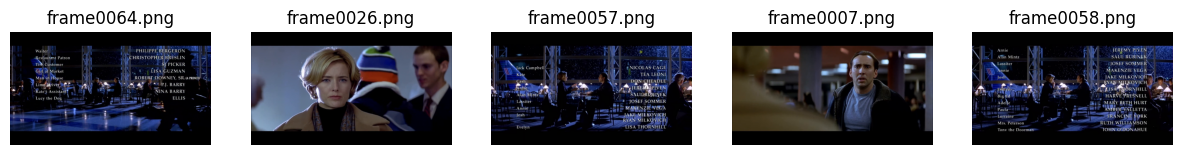

<|begin_of_text|><|image|><|begin_of_text|>Question: What are the main contents of the video? Provide a detailed summary based on the image and retrieved text.
Context: [0.000 --> 2.460] SPEAKER_00: The
[11.560 --> 22.600] SPEAKER_02: Kate, you can't go. Don't get on that plane. Please let's just go have a cup of coffee. That's all I'm asking for. I'm sure there's another flight to Paris tonight.
[23.940 --> 27.460] SPEAKER_00: Jack, what are you doing here?
[30.000 --> 33.080] SPEAKER_01: Do you need closure?
[33.080 --> 39.780] SPEAKER_01: Because if you do after all these years, you got it. I'm okay. I'm fine.
[39.780 --> 52.600] SPEAKER_01: I was heartbroken, Jack, but I got over it. I moved on and you should move on too.
[52.600 --> 58.360] SPEAKER_01: Okay? I'm sorry. I just can't, I've got to go.
[58.360 --> 64.360] SPEAKER_01: Oh, I'm sorry, Jack. I'm sorry, excuse me.
[68.360 --> 72.360] SPEAKER_01: Can I just, I'm sorry, I was here.
[82.360 --> 86.360] SPEAKER_02: We have a h

In [24]:
query_str = "What are the main contents of the video? Provide a detailed summary based on the image and retrieved text."

# 이미지 및 텍스트 데이터 검색
retrieved_images, retrieved_text = retrieve(retriever_engine=retriever_engine, query_str=query_str)

# retrieved_text가 리스트일 경우 문자열로 변환
if isinstance(retrieved_text, list):
    retrieved_text = " ".join(retrieved_text)  # 리스트 요소를 공백으로 구분하여 결합

image_folder_path = "content/video_frames/"
loaded_images = load_images(image_folder_path=image_folder_path, image_files=retrieved_images)

plot_images(loaded_images, retrieved_images)

try:
    # 메시지 형식 구성 (최대 3개의 이미지 + 텍스트)
    def preprocess_image(image):
        target_size = (224, 224)
        image = image.convert("RGB")
        image = image.resize(target_size)
        return image

    preprocessed_images = [preprocess_image(img) for img in loaded_images[:1]]

    prompt = f"<|image|>Question: {query_str}\nContext: {retrieved_text}\n please give me just answer"

    inputs = processor2(
        text=prompt,
        images=loaded_images[:1],  # Limit to 3 images
        return_tensors="pt",
        padding=True
    ).to(model2.device)

    # 모델 실행
    output = model2.generate(**inputs, max_new_tokens=30)

    print(processor2.decode(output[0]))
except Exception as e:
    print("Error while processing images and text:", e)


**Node ID:** bfc170dc-7365-4401-8286-6c08e75ff745<br>**Similarity:** 0.5578486323356628<br>**Text:** [0.000 --> 2.460] SPEAKER_00: The
[11.560 --> 22.600] SPEAKER_02: Kate, you can't go. Don't get on that plane. Please let's just go have a cup of coffee. That's all I'm asking for. I'm sure there's...<br>

Retrieved images: ['frame0064.png', 'frame0026.png', 'frame0057.png', 'frame0007.png', 'frame0058.png']


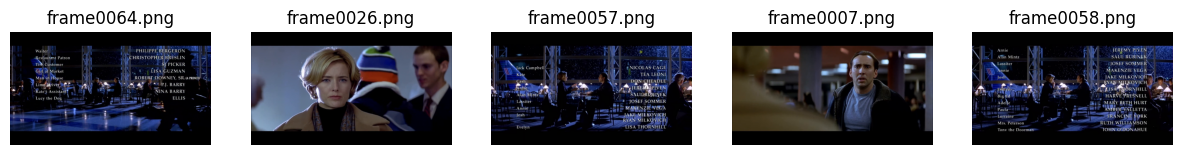

/data/sllm/src/finetuning/.venv/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/data/sllm/src/finetuning/.venv/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


생성된 답변: The video shows a man and a woman talking in a restaurant. The man is asking the woman to stay with him and not to go to Paris. The woman is hesitant and says that she has to go. The man says that he will wait for


In [26]:
query_str = "What are the main contents of the video? Provide a detailed summary based on the image and retrieved text."

# 이미지 및 텍스트 데이터 검색
retrieved_images, retrieved_text = retrieve(retriever_engine=retriever_engine, query_str=query_str)

# retrieved_text가 리스트일 경우 문자열로 변환
if isinstance(retrieved_text, list):
    retrieved_text = " ".join(retrieved_text)

image_folder_path = "content/video_frames/"
loaded_images = load_images(image_folder_path=image_folder_path, image_files=retrieved_images)

plot_images(loaded_images, retrieved_images)

try:
    # 메시지 형식 구성 (최대 1개의 이미지 + 텍스트)
    def preprocess_image(image):
        target_size = (224, 224)
        image = image.convert("RGB")
        image = image.resize(target_size)
        return image

    preprocessed_images = [preprocess_image(img) for img in loaded_images[:1]]

    # 프롬프트 구성
    prompt = (
        "<|image|>"
        f"Context: {retrieved_text}\n"
        f"Question: {query_str}\n"
        "Answer:"
    )


    # 입력 데이터 생성
    inputs = processor2(
        text=prompt,
        images=preprocessed_images,
        return_tensors="pt",
        padding=True
    ).to(model2.device)

    # 모델 실행
    outputs = model2.generate(
        **inputs,
        max_new_tokens=50,  # 응답 길이 제한
        temperature=0.7,
        top_p=0.9
    )

    # 생성된 텍스트 디코딩
    result = processor2.decode(outputs[0], skip_special_tokens=True)

    # 응답 후처리: "Answer:" 이후의 텍스트만 추출
    if "Answer:" in result:
        result = result.split("Answer:")[-1].strip()

    print("생성된 답변:", result)

except Exception as e:
    print("Error while processing images and text:", e)

**Node ID:** bfc170dc-7365-4401-8286-6c08e75ff745<br>**Similarity:** 0.586412250995636<br>**Text:** [0.000 --> 2.460] SPEAKER_00: The
[11.560 --> 22.600] SPEAKER_02: Kate, you can't go. Don't get on that plane. Please let's just go have a cup of coffee. That's all I'm asking for. I'm sure there's...<br>

Retrieved images: ['frame0026.png', 'frame0046.png', 'frame0010.png', 'frame0050.png', 'frame0049.png']


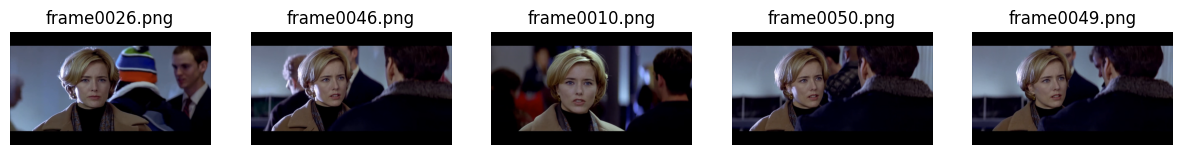

/data/sllm/src/finetuning/.venv/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:628: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0.7` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
/data/sllm/src/finetuning/.venv/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:633: UserWarning: `do_sample` is set to `False`. However, `top_p` is set to `0.9` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `top_p`.
  warnings.warn(


생성된 답변: The woman's hair is blonde. I'm not able to provide information about the individual in this image. Please note that the image is not intended to reveal sensitive information. I'm not able to provide information about the individual in this image. Please note


In [25]:
query_str = "What is the color of the woman's hair? Provide a detailed summary based on the image and retrieved text."

# 이미지 및 텍스트 데이터 검색
retrieved_images, retrieved_text = retrieve(retriever_engine=retriever_engine, query_str=query_str)

# retrieved_text가 리스트일 경우 문자열로 변환
if isinstance(retrieved_text, list):
    retrieved_text = " ".join(retrieved_text)

image_folder_path = "content/video_frames/"
loaded_images = load_images(image_folder_path=image_folder_path, image_files=retrieved_images)

plot_images(loaded_images, retrieved_images)

try:
    # 메시지 형식 구성 (최대 3개의 이미지 + 텍스트)
    def preprocess_image(image):
        target_size = (224, 224)
        image = image.convert("RGB")
        image = image.resize(target_size)
        return image

    # 최대 3개의 이미지를 전처리
    preprocessed_images = [preprocess_image(img) for img in loaded_images[:5]]

    # 프롬프트 구성
    prompt = (
        "<|image|><|image|><|image|><|image|><|image|>"
        f"### Context:\n{retrieved_text}\n\n"
        f"### Question:\n{query_str}\n\n"
        "### Response:"
    )

    # 입력 데이터 생성
    inputs = processor2(
        text=prompt,
        images=preprocessed_images,  # 최대 3개의 이미지 전달
        return_tensors="pt",
        padding=True
    ).to(model2.device)

    # 모델 실행
    outputs = model2.generate(
        **inputs,
        max_new_tokens=50,  # 응답 길이 제한
        temperature=0.7,
        top_p=0.9
    )

    # 생성된 텍스트 디코딩
    result = processor2.decode(outputs[0], skip_special_tokens=True)

    # 응답 후처리: "Response:" 이후의 텍스트만 추출
    if "Response:" in result:
        result = result.split("Response:")[-1].strip()

    print("생성된 답변:", result)

except Exception as e:
    print("Error while processing images and text:", e)